<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana1/Espacio_de_Probabilidad_y_probabilidad_condicional_en_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar y cargar librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter

import matplotlib.pyplot as plt

## Definición de funciones

#### leer_libro()

In [3]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

#### borrar_elementos()


In [4]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''
  
  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

#### limpiar_texto()

In [5]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas 
  texto = texto.lower()

  #Quitar tildes 
  
  a,b = 'áéíóúü','aeiouu'
  trans = str.maketrans( a,b)
  texto = texto.translate(trans)
  

  #Quitar puntuación y números
  texto = re.sub('[^ña-z]+', ' ', texto)

  return texto

#### obtener_frecuencias()

In [6]:
def obtener_frecuencias(lista):
  '''Devuelve diccionario con las frecuencias de los elementos de una lista
   o cadena de texto'''
  frecuencias_dict = {}
  for c in lista:
    if c in frecuencias_dict:
      frecuencias_dict[c] += 1
    else:
      frecuencias_dict[c] = 1
  #ordenar el diccionario de frecuencias
  return Counter(frecuencias_dict)

#### genera_texto_nletras()


In [7]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para 
  generar la siguiente'''

  # Diccionario que guarda para cada ngrama se guardara las letras que siguen al ngrama
  ngramas = {}                   
  for i in range(len(texto) - n):
    ng = texto[i:i+n]
    if ng not in ngramas.keys():
      ngramas[ng] = []           
    ngramas[ng].append(texto[i+n]) 

  # Generación del texto 
  ngrama = np.random.choice(list(ngramas.keys())) # primer ngrama al azar
  nuevo_texto = ngrama
  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama]) # escoge de la lista de letras que le siguen al ngrama
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [8]:
def genera_texto_npalabras(lista_palabras, n=1, tot_palabras = 100):
  '''Devuelve un texto, utilizando ngramas de palabras

  n es la cantidad de palabras que se toman en consideración para 
  generar la siguiente'''
  
  ngramas = {}
  for i in range(len(lista_palabras) - n):
    ng = ' '.join(lista_palabras[i:i+n])
    if ng not in ngramas.keys():
      ngramas[ng] = []
    ngramas[ng].append(lista_palabras[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_palabras):
    if ngrama not in ngramas.keys():
      break
    siguiente_palabra = np.random.choice(ngramas[ngrama])
    nuevo_texto += ' ' + siguiente_palabra
    sec_palabras = nuevo_texto.split()
    ngrama = ' '.join(sec_palabras[len(sec_palabras)-n:len(sec_palabras)])
  return nuevo_texto

## Leer y prepocesar texto

In [9]:
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
libro[:400]

'Gabriel García Márquez Cien años de soledad EDITADO POR "EDICIONES LA CUEVA" Para J omi García Ascot y María Luisa Elio Cien años de soledad Gabriel García Márquez Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava'

**Borrar nombre del autor y título del libro porque se repite muchas veces en el archivo**

In [10]:
borrar = ['Gabriel García Márquez', 
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)

**Convertir todas las letras a minúsculas, quitar signos de puntuación, quitar números y tildes**

In [11]:
libro_limpio = limpiar_texto(libro)

# Distribución de probabilidad de caracteres en 100 años de soledad

**Obtener diccionario con la frecuencia de ocurrencia de cada letra**

In [12]:
frec_caracteres = obtener_frecuencias(libro_limpio)
print('Letras unicas: ', len(frec_caracteres))
print('Total de letras en el libro', len(libro_limpio))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada letra en el libro')
frec_caracteres

Letras unicas:  28
Total de letras en el libro 790050

Diccionario con las frecuencia de ocurrencia  de cada letra en el libro


Counter({' ': 137910,
         'a': 88371,
         'b': 11365,
         'c': 26579,
         'd': 34108,
         'e': 82390,
         'f': 4077,
         'g': 6339,
         'h': 5706,
         'i': 41332,
         'j': 3028,
         'k': 23,
         'l': 39053,
         'm': 16998,
         'n': 45758,
         'o': 61997,
         'p': 16547,
         'q': 6770,
         'r': 44875,
         's': 45985,
         't': 25090,
         'u': 29390,
         'v': 6878,
         'w': 26,
         'x': 662,
         'y': 5094,
         'z': 2536,
         'ñ': 1163})

In [13]:
# Guardamos en una lista los caracteres unicos 
caracteres = sorted(list(frec_caracteres.keys()))

**Graficar espacio de probabilidad de cada letra**

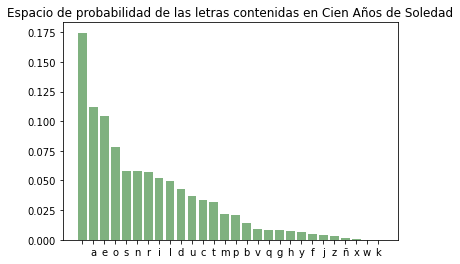

In [14]:
frec_relativa_dict = {k : v /len(libro_limpio) for k, v in frec_caracteres.items()}

#Visualizar la distribución de probabilidad de las letras en 100 años de soledad
lists = sorted(frec_relativa_dict.items(), 
               key=operator.itemgetter(1), 
               reverse=True)
x, y = zip(*lists)

plt.bar(x,y, color='darkgreen', alpha=0.5)
plt.title('Espacio de probabilidad de las letras contenidas en Cien Años de Soledad')
plt.show()

In [15]:
#Sumamos la probabilidad de cada palabra
round(sum(list(y)),2)

1.0

In [16]:
#guardar en archivo csv probabilidad de ocurrencia de cada letra
Ley_Probabilidad_letras = pd.DataFrame({'caracter':frec_relativa_dict.keys(),
                                        'probabilidad':frec_relativa_dict.values()})
Ley_Probabilidad_letras=Ley_Probabilidad_letras.sort_values('caracter')
Ley_Probabilidad_letras.to_csv('Ley_Probabilidad_caracteres_100años.csv', 
                               index=False)


## Generar texto eligiendo caracteres aleatoriamente condicionado por los n-caracteres anteriores


- ORDEN 0. **Distribución uniforme de los caracteres**

In [17]:
"".join(np.random.choice(caracteres,200))  #utilizamos np.random.choice para hacer muestreo con reemplazo

'uqarwreñl otsu fifqxddactihkizrjwñoñrjjtbvcjstmir jmsezjkehxszvqimñvpwvuxkftlibmtsocrtzxxrlngwv wcfazhlu rscxthvziowmuqvcxz llxdrsnuqb tkeysyrddkvyqvpbtcu bkczqwsiuubyryabtaozf rtzrjblssibzkfeklxqlncd'

- ORDEN 1. **Distribución de caracteres en el libro en 100 años de Soledad**

In [18]:
 "".join(random.sample(libro_limpio, 200))


'eouneaolnedlp scctnnltcede ruii aanoloairt  so oels ucd ml odbr ai na areorguactliasao   iemlesn ar ussb p  ssbelrouoao  acbn  oieeerc oce iroodp na  s   senesa ev aoasvuaina oieusaaaa d co sa isrt  c'

- ORDEN 2. **Distribución de caracteres condicionados con un caracter anterior**


In [19]:
genera_texto_nletras(libro_limpio, 1, 200)

'ban rmes ana suebyabren abrejar dalo pes a ma fl delerona cces lolado nto sexpono ces leradeicos sil pa l qurinto to ononcuntobrin da evatiema domintame pariesaguesusues pon ca am de asanas ra o e fuel'

- ORDEN 3

In [20]:
genera_texto_nletras(libro_limpio, 2, 200)


'ar nos preo el diostes hos sabue aporoxilicamarla cora de fos caba se pria la inciemos alia untamisma na to urseceniano pretras en ad cio llespue nudigno de aco ancia a cutien ca men mucitorquernos parm'

- ORDEN 4

In [21]:
genera_texto_nletras(libro_limpio,3, 200)

'xicasar sus veces supliria fras que una casa encia de leto que arbon seis dandos alboras galones de con conocincontros y subilla sensaginarias de la bella celes y lo al presar res salaboras solo enagarri'

- ORDEN 5

In [22]:
genera_texto_nletras(libro_limpio,4, 200)

'vaportal nombrar igualdres midio la licios mas tan pasaba vistorso mas onces se en el de librantes de todas como un gruesas madre aurelian en el para porqueria y mana emocio la fundio sufria por los no en'

# Distribución de probabilidad de palabras en 100 años de soledad

**Obtener diccionario con la frecuencia de ocurrencia de cada letra**

In [24]:
palabras = libro_limpio.split()
len(palabras)

137909

In [25]:
frec_palabras = obtener_frecuencias(palabras)
print('Palabras unicas: ', len(frec_palabras))
print('Total de palabras en el libro', len(palabras))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada palabra en el libro')
frec_palabras.most_common(20)

Palabras unicas:  15506
Total de palabras en el libro 137909

Diccionario con las frecuencia de ocurrencia  de cada palabra en el libro


[('de', 8695),
 ('la', 6116),
 ('que', 4794),
 ('el', 4380),
 ('y', 4148),
 ('en', 3893),
 ('a', 3165),
 ('los', 2377),
 ('se', 2167),
 ('con', 1987),
 ('un', 1786),
 ('las', 1535),
 ('una', 1505),
 ('no', 1471),
 ('por', 1469),
 ('su', 1448),
 ('le', 1175),
 ('del', 1148),
 ('para', 1020),
 ('lo', 898)]

In [26]:
# Guardamos en una lista los palabras unicos 
palabras = sorted(list(frec_palabras.keys()))

**Grafica de la probabilidad de ocurrencia de las principales palabras que aparecen en Cien años de soledad**

In [27]:
frec_relativa_palabra = {k : v /len(palabras) for k, v in frec_palabras.most_common(80)}

lists = sorted(frec_relativa_palabra.items(), 
               key=operator.itemgetter(1), 
               reverse=True)
x, y = zip(*lists)

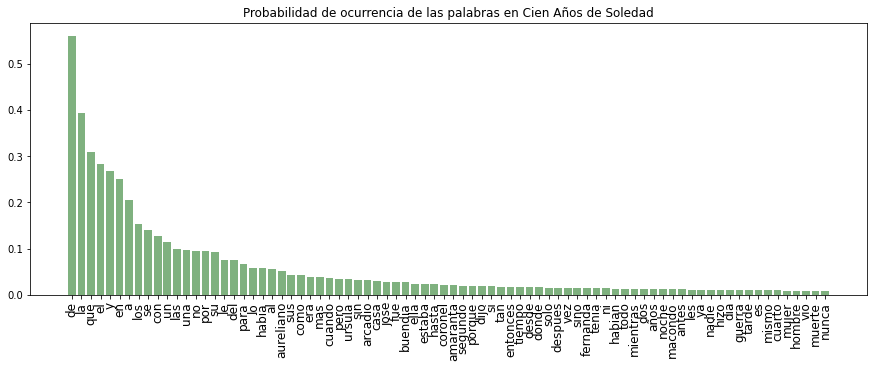

In [28]:
fig = plt.figure(figsize=(15,5))
plt.bar(x,y, 
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Cien Años de Soledad')
plt.show()

## Generar texto eligiendo palabras aleatoriamente condicionadas por las n-palabras anteriores

- Orden 0

In [30]:
' '.join(np.random.choice(palabras,100))  #distribución uniforme

'español renegrida no derrotada nivele lana atraer quebranto recordaria desvinculacion ocuparse potente redonda pulverizados rosal exprimieron tercera adheridos setenta diametro mampolon anticipada interpretar cañones recobrar apuntando iniciada crian frivolo inquieto impertinencia malvado trazado plantacion culmino patria viajaba centimetros presos ultimos indefinible preparar cura secretos alfonso prendieron mandan afectado hormigas prepararon rogaban campanas incapacitada utensilios emplazadas gritar reproche internacional mosquitos gorda milenario terrazas merecer tejer enrollar amuleto tomos casos franqueada colonial progresos lentas languidez tierno pollo correos epoca reconciliacion proclamada caudillos poblada aliento leña amordazados proceder caprichosa angosto petronio recondita luces lluvias longitud talizada erizaba contestaban resquebrajado canarios dolian corrupcion nosotras'

- Orden 1

In [32]:
' '.join(random.sample(libro_limpio.split(),100))    #Distribución en el libro

'otras se que y y acaso drasticas pesar ultimas habia para al tambien en hay al ganaban apoyada jugar tomaba de se hacerlo un la mismo sostenia no es raras habian pincho entusiastas los cuando asignado llamara largo no entendia que buscando a que y aspiraciones la cuarto informarse olan morir andaba en las su tuvo por humor derrotado noticia colindaban misma la dijo nada de asustado muerte en atencion hubiera unanime crepusculo estaba se un revoloteaban ursula sus antropofagos y a no años colgaban no mala preciosista dejo viviendo sobre que una interminable suspendio de de hasta adquirio los'

- Orden 2

In [33]:
genera_texto_npalabras(libro_limpio.split(), 1, 100)  #Distribución condicionada a la palabra anterior

'reconstruccion habian fundado la imaginacion poco se zambulleron en el peso natural dijo meme con la calle era melquiades aquel dia se quedo reducida a rastras a disposicion preciosista de los telegramas recibidos con las tardes iban abriendo a una burla y tuvo que se acusaba intimamente en que en el llanto secreto era tu mujer lo persuadio de muertos que las ultimas estrellas diurnas que su padre mientras orinaba trato de verlo al cansancio y las de veinte de que habia pedido que tuvo conciencia de anunciarse con su padre estaba dejando alli por un niño tambien el se fuera'

- Orden 3

In [34]:
genera_texto_npalabras(libro_limpio.split(), 2, 100)  # Distribución condicionada a las dos palabras anteriores

'no sentia deslizarse en el album familiar siguio buscando por supuesto crespi dijo pero menos transitorio y comprensible dotados de recursos para el amor un comun remordimiento de conciencia aquella entrevista le infundio a meme a casa de petra cotes sin perder la vista del primer levantamiento armado del coronel aureliano buendia ponto los zapatos viendolo montar picaportes y desconectar relojes fernanda se molestara para amarlo sin lastimarlo lograron tal estado de exaltacion sin alivio estuvieron a punto de ocasionar una tragedia entre los recien llegados que no le importaba cada vez menos frecuentes al atardecer y se dio cuenta sin embargo'

- Orden 4

In [35]:
genera_texto_npalabras(libro_limpio.split(), 3, 100)

'no con el olvido remediable del corazon sino con otro olvido mas cruel e irrevocable que el conocia muy bien porque habia destrozado en pocas horas raspando el comejen pero cuando vio que amaranta ursula estaba en el mundo mientras ella se consumia tejiendo coronas de palmas funebres la encontro saqueada quedaban apenas los muebles indispensables los candelabros y el servicio de plata y gualdrapas de terciopelo y el damasco del baldaquin de la cama amarro el plumero y la almohadilla del papel secante en la pata de una mesa convencido de que aquella historia no habia sido mas que una triquiñuela para'

- Orden 5

In [36]:
genera_texto_npalabras(libro_limpio.split(), 4, 100)

'la adolescencia le habia quitada la dulzura de la voz y la habia vuelta silencioso y definitivamente solitario pero en cambio le habia restituido la expresion intensa que tuvo en los ajos al nacer estaba tan concentrado en sus experimentos de plateria que apenas si abandonaba el taller para orinar bajo el castaño no recibia mas visitas que las del peluquero cada tres semanas se alimentaba de cualquier cosa que le llevaba ursula una vez al dia y aunque seguia fabricando pescaditos de oro con la del guerrero mitico que habia interpuesto entre el y el resto de la humanidad una distancia de tres'